## Example 4:  Find the current valid sea surface temp as measured by a thermosalinograph.



In [1]:
# Import the python requests and json modules
import requests
import json
from datetime import datetime, timedelta

# 1. Build up a url that will query the sensor table and filter results by sensor name and sensor class
base_url = "https://taani-pub-ship.taani.oregonstate.edu/api/sensor/?sensor_name=Thermosalinograph&sensor_id=&sensor_class=Flowthrough"

# Make the query to the REST API
response = requests.get(base_url, verify=False)

# Load the response as json data
responseJSON = json.loads(response.text)

# Print all thermosalinograph sensors in the flowthrough system
#print(json.dumps(responseJSON, indent=4, sort_keys=True))


/opt/homebrew/lib/python3.10/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'taani-pub-ship.taani.oregonstate.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [2]:
#2. Filter all sensors for enabled (active), flowthrough, and "thermosalinograph"

sensor_url = "https://taani-pub-ship.taani.oregonstate.edu/api/sensor/?sensor_name=Thermosalinograph&sensor_class=Flowthrough&enabled=true"

# Make the query to the REST API
response = requests.get(sensor_url, verify=False)

# Load the response as json data
responseJSON = json.loads(response.text)

# Print the element for the enabled thermosalinograph
# print(json.dumps(responseJSON, indent=4, sort_keys=True))

/opt/homebrew/lib/python3.10/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'taani-pub-ship.taani.oregonstate.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


### Identify first TSG sensor_id 
### Sensor_ID: seatsg450712

In [3]:
#4. find parameter_id for tempearture for the sensor if interest.

parameter_url = "https://taani-pub-ship.taani.oregonstate.edu/api/parameter/?sensor_id=seatsg450712&short_name=Temperature&format=json"
response = requests.get(parameter_url, verify=False)

# Load the response as json data
responseJSON = json.loads(response.text)

print(responseJSON)

[{'parameter_id': '9ded3f5f-6e16-456e-b991-fe3cc8ed7a44', 'short_name': 'Temperature', 'long_name': 'Temperature', 'description': 'Located at the Main Sensor Manifold, this thermosalinograph measures flowthrough sea surface temperature ranging from -5 to 35 degrees Celsius.', 'samos_data_category': 'Sea Surface Temperature', 'processing_status': 'raw', 'processing_symbol': 'temperature', 'diagnostic': False, 'gross_min': None, 'gross_max': None, 'recommended_min': None, 'recommended_max': None, 'global_min': -5.0, 'global_max': 35.0, 'local_min': None, 'local_max': None, 'detection_limit': None, 'saturated': None, 'bad_data_value': 9999.999, 'accuracy': 0.002, 'precision': None, 'resolution': 0.0001, 'data_model': 'SensorFloat1', 'data_table': 'sensor_float_1', 'archive_data_table': 'sensor_float_1_archive', 'data_fieldname': 'p1', 'flag_fieldname': 'f1', 'binned_default_model': 'BinnedDefaultFlowRolling', 'binned_default_table': 'binned_default_flow_rolling', 'binned_default_fieldname

/opt/homebrew/lib/python3.10/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'taani-pub-ship.taani.oregonstate.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
#5. Isolate the temperature variable
print("Temperature parameter_id = "+responseJSON[0]['parameter_id'])
print("data_table = "+responseJSON[0]['data_table'])
print("data_fieldname = "+responseJSON[0]['data_fieldname'])

Temperature parameter_id = 9ded3f5f-6e16-456e-b991-fe3cc8ed7a44
data_table = sensor_float_1
data_fieldname = p1


In [5]:
sensor_float_url = "https://taani-pub-ship.taani.oregonstate.edu/api/sensor_float_1/"

# Set the start date and time using the ISO8601 format, data stored in UTC

end_date = datetime.now()
start_date = end_date-timedelta(hours=0, minutes=60)

print(str(end_date), str(start_date))

query_url = sensor_float_url+'?date_after='+str(start_date)+'&date_before='+str(end_date)+'&format=json'

response = requests.get(query_url, verify=False)
# Load the response as json data
responseJSON = json.loads(response.text)

#print(responseJSON)
#print(json.dumps(responseJSON, indent=4, sort_keys=True))

2024-07-15 14:03:41.222490 2024-07-15 13:03:41.222490


/opt/homebrew/lib/python3.10/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'taani-pub-ship.taani.oregonstate.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [12]:
binned_url = "https://taani-pub-ship.taani.oregonstate.edu/api/binned_default_flow/"
query_url = binned_url+'?date_after='+str(start_date)+'&date_before='+str(end_date)+'&format=json'
print(query_url)
response = requests.get(query_url, verify=False)

# Load the response as json data
responseJSON = json.loads(response.text)

print(len(responseJSON))
#for i in responseJSON:
#    print(i['datetime_center'])
# print(json.dumps(responseJSON, indent=4, sort_keys=True))


https://taani-pub-ship.taani.oregonstate.edu/api/binned_default_flow/?date_after=2024-07-15 13:03:41.222490&date_before=2024-07-15 14:03:41.222490&format=json
60


In [7]:
#define an emptylist: 
latitude_list=[]
for i in responseJSON:
    latitude_list.append(i["latitude"])
print(len(latitude_list))
print(latitude_list)

latitude_maximum = max(latitude_list)
latitude_minimum = min(latitude_list)

60
[58.020890466666664, 58.02090091666667, 58.02091533333334, 58.020930650000004, 58.02093911666666, 58.020946583333334, 58.020948849999996, 58.020948983333334, 58.020945366666666, 58.020940483333334, 58.0209346, 58.02092961666667, 58.02092531666667, 58.02092471666666, 58.0209291, 58.02093081666667, 58.020934133333334, 58.02093549999999, 58.02093665, 58.02094054999999, 58.0209445, 58.020949433333335, 58.02095510000001, 58.02096045, 58.020970133333336, 58.02098206666666, 58.020991766666675, 58.02100553333333, 58.02102248333334, 58.021036450000004, 58.02105196666666, 58.02106646666666, 58.021080399999995, 58.0210933, 58.021103700000005, 58.021118166666675, 58.02113033333333, 58.02114411666666, 58.021157366666664, 58.02116935000001, 58.02118348333333, 58.02120046666667, 58.02121643333333, 58.0212317, 58.021251050000004, 58.02126826666666, 58.02128778333334, 58.02130568333334, 58.02132611666666, 58.02133834999999, 58.02134854999999, 58.02135615, 58.02135929999999, 58.02136386666666, 58.021

In [8]:
longitude_list=[]
for i in responseJSON:
    longitude_list.append(i["longitude"])
print(len(longitude_list))
print(longitude_list)

longitude_maximum = max(longitude_list)
longitude_minimum = min(longitude_list)

60
[-147.73086511666668, -147.73077831666666, -147.73068471666664, -147.73058899999998, -147.73052565, -147.7304845, -147.73046578333333, -147.73047255, -147.73048763333333, -147.73052085, -147.73055876666666, -147.73059276666666, -147.73061093333334, -147.73061195, -147.73059791666668, -147.73058541666666, -147.73057298333333, -147.73055735, -147.7305413166667, -147.73052189999999, -147.7304992166667, -147.73047025, -147.73043475, -147.73038518333334, -147.73032418333332, -147.7302528, -147.73017236666666, -147.7300828333333, -147.72998593333332, -147.7298876, -147.72979311666668, -147.7296977, -147.72960363333334, -147.72951828333333, -147.72944323333334, -147.72936513333335, -147.72928488333335, -147.72920533333334, -147.72912198333333, -147.72903266666665, -147.72894426666664, -147.7288468, -147.72874691666667, -147.7286421166667, -147.72853064999998, -147.72841123333333, -147.72828901666665, -147.72817258333333, -147.7280624, -147.72797183333333, -147.72790433333333, -147.7278591,

In [9]:
#Import the modules needed to create the map
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature

In [10]:
extents = (longitude_minimum,longitude_maximum,latitude_minimum,latitude_maximum)
print(extents)

(-147.73086511666668, -147.72764896666666, 58.020890466666664, 58.02138775)


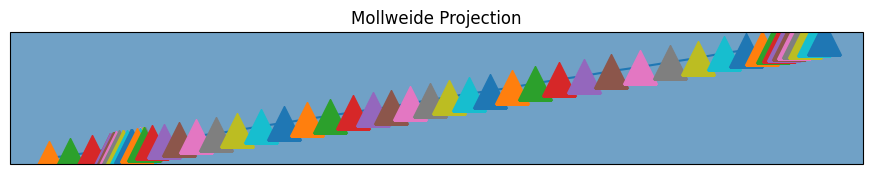

In [11]:
# Imports
import warnings
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature

# empty lists to add lat and lon to later
lons=[]
lats=[]
temp=[]

# Method for plotting lines
for i in responseJSON:
    x = i['longitude']
    y = i['latitude']
    lons.append(x)
    lats.append(y)

#  Suppress warnings issued by Cartopy when downloading data files
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(11, 8.5))
projMoll = ccrs.Mollweide(central_longitude=0)
ax = plt.subplot(1, 1, 1, projection=projMoll)
ax.plot(lons, lats)

# Method for plotting points
for i in responseJSON:
    ms = i['parameter_01']['a'][4]/2.2
    ax.plot(i['longitude'], i['latitude'], '^', markersize=ms)

ax.set_title("Mollweide Projection")
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')
ax.stock_img()

In [22]:
new_york = dict(lon=-74.0060, lat=40.7128)
print(new_york)

{'lon': -74.006, 'lat': 40.7128}
